# Sentiment Analysis with TextBlob & Word Cloud

To use language markers to analyze the relationship between depression and seasons or other social events for our project, we have to figure out some potential libraries and methods that are suitable. During research, we found two interesting tools, TextBlob and WordCloud, that could be useful for our project. 

TextBlob, a Python library for prossing textual data, is useful for sentiment analysis by a pre-defined dictionary classifying negative and positive words. TextBlob assigns a score, between [-1, 1] to each word in a sentence, then by operations, for example, multipys and takes average, to get the final results. TextBlob returns polarity and subjectivity of a sentence which we can further analyze. 

Word Cloud is a tool for datavisualization in Python which representing text data in which the size of each word indicates its frequency or importance. With this technique, we can look into what are the most mentioned words in a positive/ negative sentence.

At this stage, we tried to test their suitability and feasibility, to determine if we should keep working with these techniques or search for other new ones.

## 1. Intsall TextBlob and WordCloud, and restart pc

In [6]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

## 2. Extract three sentences from Quotebank to test the sentiment analysis

- **Polarity tells us how positive or negative the comment is**
  - Value of polarity is range of -1 to 1, -1 defines a negative sentiment, 1 defines a positive sentiment
- **Value of the subjectivity quantifies whether it is a personal opinion or a factual information**
  - Value of polarity is range of 0 to 1, 0 means a factual information, 1 corressponds to personal opinion

- **Three example sentences**
    - And for the record, Eamonn Holmes made me laugh, he lightened a very emotional moment and I'm very happy that he did.
    - And he stood there patiently and said, `I'm here to help you. I want to help you.' And I would roll up my window and look the other way.
    - and he was trying to tie the record of Harry Vardon: six British Opens. He was under a lot of pressure also. We were not close, but champions in the same category never are close. You never see both go outside for dinner. Never. That's not because it is personal. The competition carries on, not just on the golf course, but off the golf course also. It was that way for me and Watson.


In [9]:
text1 = "And for the record, Eamonn Holmes made me laugh, he lightened a very emotional moment and I'm very happy that he did."
blob1 = TextBlob(text1)
blob1.sentiment

Sentiment(polarity=0.43333333333333335, subjectivity=0.6483333333333333)

In [10]:
text2 = "And he stood there patiently and said, `I'm here to help you. I want to help you.' And I would roll up my window and look the other way."
blob2 = TextBlob(text2)
blob2.sentiment

Sentiment(polarity=-0.125, subjectivity=0.375)

In [11]:
text3 = "and he was trying to tie the record of Harry Vardon: six British Opens. He was under a lot of pressure also. We were not close, but champions in the same category never are close. You never see both go outside for dinner. Never. That's not because it is personal. The competition carries on, not just on the golf course, but off the golf course also. It was that way for me and Watson."
blob3 = TextBlob(text3)
blob3.sentiment

Sentiment(polarity=0.0, subjectivity=0.11875)

## 3. Conduct more sentiment analysis for the 100-sentence file downloaded from Quotebank

In [12]:
data_folder = './data/'
qb = pd.read_csv(data_folder + 'bbear_sample_sentence_100_199.csv')
qb

,Unnamed: 0,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,domains
0,100,2020-01-09-005030,And [ festivalgoers ] are also drawn to coming...,Jonathan Sykes,['Q6274563'],2020-01-09 08:27:28,3,"[['Jonathan Sykes', '0.5899'], ['Ben Jones', '...","['http://home.nzcity.co.nz/nl.aspx?4422414', '...",E,"['co.nz', 'co.nz', 'co.nz']"
1,101,2020-02-07-005251,"And for the record, Eamonn Holmes made me laug...",Phillip Schofield,['Q7185804'],2020-02-07 20:30:49,2,"[['Phillip Schofield', '0.8657'], ['Eamonn Hol...",['https://www.dailystar.co.uk/showbiz/breaking...,E,"['co.uk', 'co.uk']"
2,102,2020-02-08-002386,"And he stood there patiently and said, `I'm he...",None,[],2020-02-08 00:00:00,57,"[['None', '0.7498'], ['Karen Brown', '0.2502']]",['http://delmarvapublicradio.net/post/police-o...,E,"['net', 'org', 'org', 'org', 'org', 'net', 'or..."
3,103,2020-04-13-002728,and he was trying to tie the record of Harry V...,Ivan Ballesteros,['Q58166424'],2020-04-13 12:24:06,1,"[['Ivan Ballesteros', '0.9141'], ['None', '0.0...",['http://golfdigest.com/story/seve-ballesteros'],E,['com']
4,104,2020-01-11-002445,And help he always did. For someone who prefer...,Anna Wintour,['Q230744'],2020-01-11 01:46:07,3,"[['Anna Wintour', '0.9198'], ['None', '0.0802']]",['https://www.irishmirror.ie/showbiz/celebrity...,E,"['ie', 'co.uk', 'co.uk']"
...,...,...,...,...,...,...,...,...,...,...,...
95,195,2020-02-02-004416,Back to work. Design meeting. My coworker gett...,Eva Mendes,['Q170606'],2020-02-02 20:46:00,1,"[['Eva Mendes', '0.8425'], ['None', '0.1182'],...",['http://www.cheatsheet.com/entertainment/some...,E,['com']
96,196,2020-01-01-003476,Bangladesh to date has not planned anything li...,None,[],2020-01-01 20:11:09,1,"[['None', '0.9103'], ['Asaduzzaman Khan', '0.0...",['https://defence.pk/pdf/threads/bangladesh-de...,E,['pk']
97,197,2020-01-14-008170,"Bankrupts cannot be candidates,",Mahathir Mohamad,['Q181383'],2020-01-14 01:12:00,1,"[['Mahathir Mohamad', '0.9157'], ['None', '0.0...",['https://www.thestar.com.my/news/nation/2020/...,E,['com.my']
98,198,2020-03-05-007193,"Barcelona is always complicated, their way of ...",Meho Kodro,['Q380566'],2020-03-05 16:34:20,1,"[['Meho Kodro', '0.8612'], ['None', '0.0943'],...",['https://ghanasoccernet.com/griezmann-must-ad...,E,['com']


## 3.1 Append columns of polarity and subjectivity to the data frame extracted from Quotebank

In [13]:
df = pd.DataFrame(qb['quotation'])
df

,quotation
0,And [ festivalgoers ] are also drawn to coming...
1,"And for the record, Eamonn Holmes made me laug..."
2,"And he stood there patiently and said, `I'm he..."
3,and he was trying to tie the record of Harry V...
4,And help he always did. For someone who prefer...
...,...
95,Back to work. Design meeting. My coworker gett...
96,Bangladesh to date has not planned anything li...
97,"Bankrupts cannot be candidates,"
98,"Barcelona is always complicated, their way of ..."


In [14]:
lst_polarity = []
lst_subjectivity = []

for element in range(0, 100):
    blob = TextBlob(df.quotation[element])
    sent = blob.sentiment
    lst_polarity.append(sent[0])
    lst_subjectivity.append(sent[1])

df['polarity'] = lst_polarity
df['subjectivity'] = lst_subjectivity

df

,quotation,polarity,subjectivity
0,And [ festivalgoers ] are also drawn to coming...,0.800000,0.750000
1,"And for the record, Eamonn Holmes made me laug...",0.433333,0.648333
2,"And he stood there patiently and said, `I'm he...",-0.125000,0.375000
3,and he was trying to tie the record of Harry V...,0.000000,0.118750
4,And help he always did. For someone who prefer...,-0.100000,0.566667
...,...,...,...
95,Back to work. Design meeting. My coworker gett...,0.209091,0.413636
96,Bangladesh to date has not planned anything li...,0.000000,0.000000
97,"Bankrupts cannot be candidates,",0.000000,0.000000
98,"Barcelona is always complicated, their way of ...",-0.175000,0.691667


## 3.2 Label positive, negative or neutral via their polarity
- Positive for polarity > 0
- Negative for polarity < 0
- Neutral for polarity ==0

In [15]:
df['label'] = '0'

df.label[df.polarity > 0] = 'positive'
df.label[df.polarity < 0] = 'negative'
df.label[df.polarity == 0] = 'neutral'
df

<ipython-input-15-40add7dd8730>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.label[df.polarity > 0] = 'positive'
<ipython-input-15-40add7dd8730>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.label[df.polarity < 0] = 'negative'
<ipython-input-15-40add7dd8730>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.label[df.polarity == 0] = 'neutral'


,quotation,polarity,subjectivity,label
0,And [ festivalgoers ] are also drawn to coming...,0.800000,0.750000,positive
1,"And for the record, Eamonn Holmes made me laug...",0.433333,0.648333,positive
2,"And he stood there patiently and said, `I'm he...",-0.125000,0.375000,negative
3,and he was trying to tie the record of Harry V...,0.000000,0.118750,neutral
4,And help he always did. For someone who prefer...,-0.100000,0.566667,negative
...,...,...,...,...
95,Back to work. Design meeting. My coworker gett...,0.209091,0.413636,positive
96,Bangladesh to date has not planned anything li...,0.000000,0.000000,neutral
97,"Bankrupts cannot be candidates,",0.000000,0.000000,neutral
98,"Barcelona is always complicated, their way of ...",-0.175000,0.691667,negative


## 3.3 Count the number of sentences being labeled by positive, negative, and neutral respectively   

In [16]:
len(df[df.polarity > 0])

47

In [17]:
len(df[df.polarity < 0])

19

In [18]:
len(df[df.polarity == 0])

34

## 4. Install nltk for Word Cloud library to draw word cloud

In [19]:
import nltk; nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Katrina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Katrina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Katrina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Katrina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Katrina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nlt

True

In [20]:
from wordcloud import WordCloud
WordCloud

wordcloud.wordcloud.WordCloud

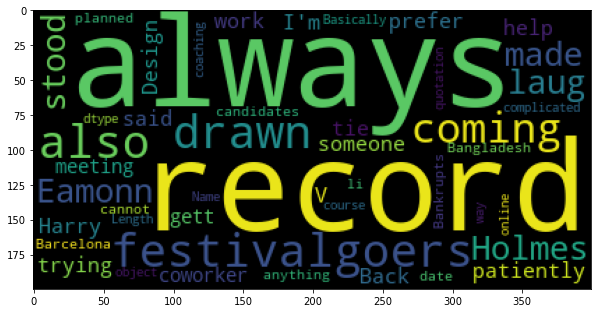

In [21]:
cloud = WordCloud(max_words=50, stopwords = stopwords.words("english")).generate(str(df['quotation']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

## 4.1 Plot a Word Cloud with positive sentimentive sentences
Select the sentences with the positive labels

In [22]:
df_positive=df[df.label=="positive"]
df_positive.shape

(47, 4)

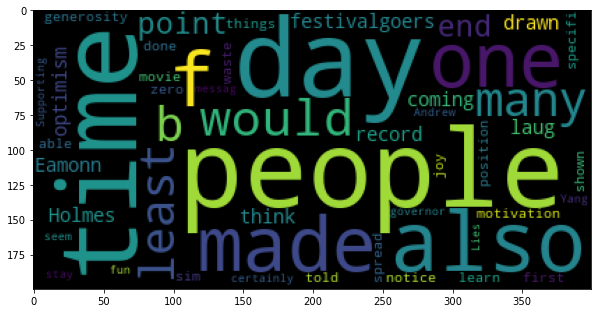

In [23]:
cloud = WordCloud(max_words=50, stopwords = stopwords.words("english")).generate(str(df_positive['quotation']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

## 4.2 Plot a Word Cloud with negative sentimentive 
Select the sentences with the positive labels

In [24]:
df_negative=df[df.label=="negative"]
df_negative.shape

(19, 4)

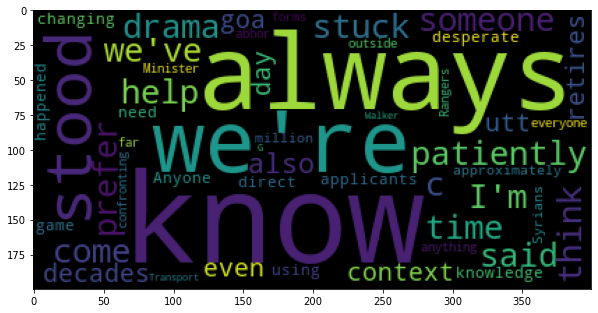

In [25]:
cloud = WordCloud(max_words=50, stopwords = stopwords.words("english")).generate(str(df_negative['quotation']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

## 5. Overall sentiment analysis of these 100 sentences
Count the number of sentences being labeled positive, negative and neutral to see the distribution of this randomly extracted 100-sentence dataset.

<AxesSubplot:title={'center':'Sentiment Analysis'}>

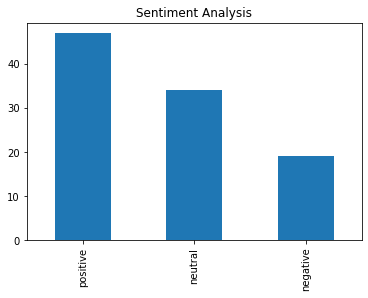

In [26]:
df.label.value_counts().plot(kind='bar',title="Sentiment Analysis")

## 6. Discussion
With a quick test on the two libraries, we found that TextBlob might not be suitable for our project, while Word Cloud is a nice technique that we would like to keep and apply in our projct.

From the visualizatoin of Word Cloud, we can see that the most frequent and important words in the two sets, positive and negative sentiment, classified by TextBlob are quite random and not related to the words that we found correlates with depression. On the other hand, Word Cloud visualizatoin is really nice for this project from two aspects. First, as we did in this notebook, we can evaluate the result of our classification easily. Second, with the most frequent and important words listed, we can analyze and further apply these words as prediction model in the future.

To improve the accuracy of the sentiment labeling, we may need to consider using the customized label tools, such as TensorFlow Hub, in the future. Moreover, we may need to apply some tricks to deal the bags of words to enhance the quality and accuracy of our analysis. The potential techniquies are stopword removal, lemmatization, LDA and TF-IDF matrix.